# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Ignatius Novianto Hariwibowo
- **Email:** novianto.wibowo@uajy.ac.id
- **ID Dicoding:** novianto_j41b

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Produk apa yang paling banyak dibeli?

- Pertanyaan 2: Apakah nilai angkut atau freight value ditentukan oleh karaktersitik produk(berat, panjang, lebar)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data yang digunakan pada proyek adalah dari **E-commerce-public-dataset**,dengan data set adalah customer, order, produk, dan penjualan.

### Gathering Data

**Memuat data customer**

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Memuat data order**

In [3]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Memuat data produk**

In [4]:
product_df = pd.read_csv("products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Memuat data penjualan**

In [5]:
sales_df = pd.read_csv("order_items_dataset.csv")
sales_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Deskripsi data

**Insight:**
- Terdapat empat data set yang digunakan pada analisa kali ini.


### Assessing Data


### 1. Menilai data konsumen

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Dari deskripsi data konsumen tersebut didapati 9.9441 data untuk lima kolom informasi. Dari data tersebut, tidak ada indikasi data missing karena jumlah data sama untuk setiam kolom.

In [7]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Dari pengecekan data tidak didapati ada duplikasi data pada tabel customers. Dengan demikian dapat dikatakan bahwa tidak ada permasalah data pada tabel customers

In [8]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Data customers dari tabel memuat banyak data keterangan / kata, sehingga pada saat data dideskripsikan, hanya data terkait dengan kode pos konsumen yang dapat dideskripsikan scara angka. Namun demikian informasi deskripsi tersebut tidak memiliki makna karena kode pos merupakan keterangan konsumen, bukan nilai transaksi

### 2. Menilai data orders


In [9]:
# info data orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Dari info data diperoleh informasi terdapat 9.9441 pada tabel orders. Namu terdapat indikasi mising value pada kolom order_approved_at , order_delivered_carrier_date , order_delivered_customer_date , order_estimated_delivery_date.

Indikasi ini disebabkan karena jumlah record data lebih rendah dari jumlah record data order.

In [10]:
# cek missing value data orders
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Dari hasil indentifikasi lebih lanjut, diperoleh informasi bahwa data missing adalah sebanyak 160 untuk data approved, 1.783 untuk data pengiriman, dan 2.965 untuk data barang sampai.

In [11]:
# cek duplikasi data dan deskripsi data
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Hasil dari identifikasi menunjukkan tidak ada data duplikat pada tabel orders. selain itu, hasil deskripsi menunjukkan customer yang paling banyak melakukan order, yaitu customer dengan id 9ef432eb6251297304e76186b10a928d

### 3. Menilai data produk

In [13]:
# memuat data produk
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Hasil info meunjukkan bahwa terindikasi adanya missing value dari data yang terkait dengan nama dan deskripsi produk

In [14]:
# cek missing value data product
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


hasil menunjukkan terdapat 610 nama produk yang hilang namun masih memiliki produk id.

In [15]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Hasil menunjukkan bahwa tidak terdapat duplikasi data.

### 4. Menilai data penjualan

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


hasil menunjukkan tidak ada data yang hilang

In [17]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


hasil di atas menunjukkan tidak ada duplikasi data dan tidak ada yang aneh dalam tabel penjualan

## **Cleaning Data**

dari hasil asseing diperoleh bahwa data bermasalah ada pada tabel produk dan tabel order. Oleh karena itu cleaning data akan dilakukan pada kedua tabel tersebut.

**1. Menangani missing value pada tabel orders_df**

Mengatasi tipe data yang tidak sesuai

In [33]:
# merubah data object menjadi datetime
import pandas as pd

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  # Convert to datetime, handling errors by coercing invalid values to NaT (Not a Time)
  orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')

In [34]:
# manampilkan data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              96476 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


tipe data telah sesuai yaitu, data tanggal telah menggunakan tipe data datetime

In [35]:
# menunjukkan data yang missing
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaT,NaT,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaT,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaT,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaT,NaT,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaT,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaT,NaT,NaT,2017-09-15


Dalam proses identifikasi, ditemukan missing valu disebabkan oleh proses transaksi yang tidak berlanjut. oleh karena itu penyelesaian missing value yang dipilih adalah mengisi data dengan keterangan = Tidak dikirim.

In [36]:
# mengisi missing value dengan keterangan tidak dikirim
orders_df['order_approved_at'] = orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_customer_date'].fillna('Tidak Dikirim')

In [38]:
# cek missing value data product
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [39]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,Tidak Dikirim,Tidak Dikirim,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,Tidak Dikirim,Tidak Dikirim,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,Tidak Dikirim,Tidak Dikirim,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,Tidak Dikirim,Tidak Dikirim,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,Tidak Dikirim,Tidak Dikirim,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,Tidak Dikirim,Tidak Dikirim,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,Tidak Dikirim,Tidak Dikirim,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,Tidak Dikirim,Tidak Dikirim,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,Tidak Dikirim,Tidak Dikirim,NaT,2017-09-15


In [24]:
#mengisi tabel dengan belum dikirim
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna('Belum Dikirim')

In [40]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Hasil dari mengisi missing value dengan keterangan belum dikirim/ tidak dikirim. setelah treatment dilakukan maka hasilnya dalah tidak ada missing value.

**2. Menangani missing value pada tabel products_df**

In [41]:
#cek missing value
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [42]:
# manampilan missing value
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


keterangan tersebut menunjukkan bahwa nama produk yang hilang juga diikuti dengan deskripsi produk yang hilang. Karena produk tersebut masih memiliki Id maka cara mengatasinya adalah dengan mengisi data dengan keterangan.

In [43]:
product_df['product_category_name'].fillna('Unkwon')
product_df['product_name_lenght'].fillna(0)
product_df['product_description_lenght'].fillna(0)
product_df['product_photos_qty'].fillna(0)


,product_photos_qty
0,1.0
1,1.0
2,1.0
3,1.0
4,4.0
...,...
32946,2.0
32947,1.0
32948,1.0
32949,2.0


In [44]:
product_df['product_weight_g'] = product_df['product_weight_g'].fillna(0.0)
product_df['product_length_cm'] = product_df['product_length_cm'].fillna(0.0)
product_df['product_height_cm'] = product_df['product_height_cm'].fillna(0.0)
product_df['product_width_cm'] = product_df['product_width_cm'].fillna(0.0)

In [45]:
#cek missing value
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Pengisian nilai yang hilang dari data nama produk diberkan unknown, sedangkan nilai lain diberikan 0 karena memang datanya tidak ada.

**Insight**
1. Masalah data yang ada adalah data yang hilang. pendekatan yang digunakan adalah mengisi dengnan nilai keternagn yang sesuai.

## Exploratory Data Analysis (EDA)

### 1. Explor data customer

Setelah proces cleaning data, tahap selanjutnya adalah Explor data. Pertama adalah explor data konsumen.

In [31]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Hasil deskripsi menunjukkan kota Sao Paolo merupakan kota yang memiliki tingkat pembelian yang tertinggi dari pada kota lainnya.

Setelah diketahui bahwa kota sao paolo merupakan kota dengan tingkat pembelian tertinggi, maka jumlah pembelian dapat diketahui sebagai berikut.

In [48]:
# mengelompokkan konsumen berdasar kota tempat transaksi tertinggi
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Dari hasil pengelompokan, diperoleh informasi bahwa transaksi terbanyak terjadi di sao paolo sebanyak 15.540 transaksi, selanjutnya adalah kota rio d janero (6882), dan belo horizonte (2773).

### 2. Explore Data Order

Eksloprasi data order dilakukan untuk melihat seberapa lama proses transaksi dari order hingga barang sampai kepada konsumen.

In [50]:
# menghitung selisih waktu dengan menambahkan data baru yaitu delivery time

delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [49]:
# menampilkan gambaran umum dari data order
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,96476,99441,99441.000000
unique,99441,99441,8,NaN,95665,95665,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,Tidak Dikirim,Tidak Dikirim,NaN,NaN,NaN
freq,1,1,96478,NaN,2965,2965,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,23.675265
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,2016-10-11 13:46:32,2016-09-30 00:00:00,2.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,18.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,23.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,28.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,2018-10-17 13:22:46,2018-11-12 00:00:00,155.000000


Dari hasil oleh deskripsi dipahami bahwa waktu tercepat proses transaksi adalah 2 hari, sedangkan waktu terlama adalah 155. namun rata-rata waktu pengiriman adalah 23. 6 hari. Hasil ini cukup valid karena nilai tengah data juga menunjukkan 23 hari.

### 3. Eksplor data order dan konsumen

untuk dapat mendapatkan pemahamn tentang data yang lebih luas. maka penggabungan data order dan konsumen akan dilakukan.

In [51]:
# Proses penggabungan data order dan konsumen
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-18,16.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-13,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-09-04,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-15,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-16 18:17:02,2018-02-16 18:17:02,2018-02-26,12.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [52]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Dari deskripsi tersebut, dapat dipahami bahwa banyak konsumen banyak dari kota sao paolo.

In [60]:
orders_customers_df.groupby(by="order_status").agg({
    "customer_id": "nunique",
    "order_status": "count",
    "delivery_time": "mean"
})

,customer_id,order_status,delivery_time
order_status,,,
approved,2,2,24.500000
canceled,625,625,22.572800
created,5,5,27.400000
delivered,96478,96478,23.644188
invoiced,314,314,25.267516
processing,301,301,29.837209
shipped,1107,1107,25.044264
unavailable,609,609,23.341544


Dari tersebut dapat dipahami bahwa, data merupakan data berjalan. Dari data tersebut menunjukkan banya order yang telah terkirim. Dari produk yang terkirim, rata-rata waktu yang diperlukan untuk barang sampai ke konsumen adalah 23 hari.

In [61]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Data di atas menunjukkan jumlah pesanan (order_id) yang diterima dari berbagai negara bagian di Brasil. Berikut adalah beberapa kesimpulan yang dapat diambil dari data tersebut:

Negara Bagian dengan Pesanan Terbanyak:
1. São Paulo (SP) memiliki jumlah pesanan tertinggi dengan 41.746 pesanan.
2. Rio de Janeiro (RJ) berada di posisi kedua dengan 12.852 pesanan.
3, Minas Gerais (MG) di posisi ketiga dengan 11.635 pesanan.


### 4. Eksplorasi Data product_df dan sales_df



Selanjutnya kita akan melihat data penjualan dan produk

In [62]:
product_df.describe(include="all")
sales_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [65]:
sales_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


**Insight:**

In [67]:
sales_product_df = pd.merge(
       left=sales_df,
       right=product_df,
       how="left",
       left_on="product_id",
       right_on="product_id"
   )

sales_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [70]:
sales_product_df.groupby(by="product_category_name").agg({
    "price": "mean",
    "freight_value": "mean"
}).sort_values(by="price", ascending=False)


,price,freight_value
product_category_name,,
pcs,1098.340542,48.454680
portateis_casa_forno_e_cafe,624.285658,36.156053
eletrodomesticos_2,476.124958,44.538571
agro_industria_e_comercio,342.124858,27.564151
instrumentos_musicais,281.616000,27.409544
...,...,...
alimentos_bebidas,54.602446,16.215791
cds_dvds_musicais,52.142857,16.070714
fraldas_higiene,40.194615,14.709744


Hasil pengelompokan menunjukkan bahwa hrga barang tertinggi adalah kategori barang pcs.

Untuk explor data menyeloruh maka semua data dapat digabungkan

In [72]:
## Penggambungan data

all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-20 23:43:48,2017-09-20 23:43:48,2017-09-29,16.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-12 16:04:24,2017-05-12 16:04:24,2017-05-15,19.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-01-22 13:19:16,2018-01-22 13:19:16,2018-02-05,21.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-14 13:32:39,2018-08-14 13:32:39,2018-08-20,12.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-01 16:42:31,2017-03-01 16:42:31,2017-03-17,40.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [77]:
all_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "product_id": "count",
    "price": "mean"
}).head(10)

product_id   price
customer_city       product_category_name                          
abadia dos dourados cool_stuff                            1  199.00
                    esporte_lazer                         1  120.00
                    livros_interesse_geral                1   39.90
abadiania           eletroportateis                       1  949.99
abaete              bebes                                 1   65.00
                    beleza_saude                          1  208.90
                    cama_mesa_banho                       1  105.90
                    cool_stuff                            1   85.99
                    fashion_bolsas_e_acessorios           1  449.00
                    ferramentas_jardim                    1  135.00

Data tersebut menampilan barang yang dibeli konsumen dari kota tempat tinggal konsumen.

In [88]:
all_df.groupby(by=["order_status", "customer_state"]).agg({
    "product_id": "count",
    "price": "mean"
}).head(20)



product_id       price
order_status customer_state                        
approved     MG                       2   19.850000
             SP                       1  169.900000
canceled     BA                      14  302.940000
             CE                       4  247.662500
             DF                       9  190.832222
             ES                       8  188.147500
             GO                      10  672.149000
             MA                       4   89.150000
             MG                      56  207.872143
             MS                       1   57.990000
             MT                       1  140.000000
             PA                       1  126.690000
             PB                       2  196.990000
             PE                       5  209.618000
             PI                       3   84.663333
             PR                      21  295.271429
             RJ                      69  176.367391
             RO                       1  109.000000
             RR                       1   89.990000
             RS                      23  325.840870

Karena data yang banyak maka deskripsi hanya menampilan sebagian data yang ada. Dari data yang ada dapat dipahami bahwa banyak cancel barang terjadi di daerah RJ.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend penjualan di tahun 2017 dan 2018

In [90]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "mean"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-90-57ca66923573>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,2016-09,3,44.560000
1,2016-10,308,136.384738
2,2016-11,0,NaN
3,2016-12,1,10.900000
4,2017-01,789,125.982063


from matplotlib import pyplot as plt
_df_0['order_count'].plot(kind='hist', bins=20, title='order_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('order_purchase_timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='order_count', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['order_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('order_purchase_timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='order_purchase_timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('order_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('order_purchase_timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='order_purchase_timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['order_purchase_timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'order_purchase_timestamp'}, axis=1)
              .sort_values('order_purchase_timestamp', ascending=True))
  xs = counted['order_purchase_timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('order_purchase_timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='order_purchase_timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['order_count'].plot(kind='line', figsize=(8, 4), title='order_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['order_purchase_timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='order_count', y='order_purchase_timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['order_purchase_timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='revenue', y='order_purchase_timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-100-3c40997331e9>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


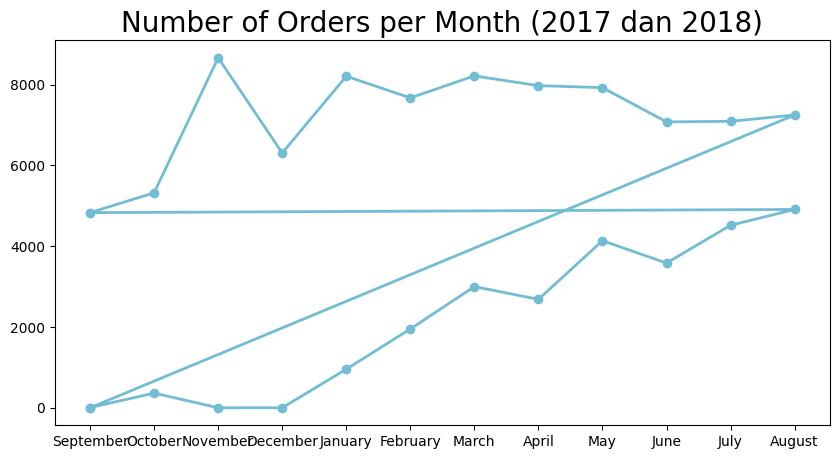

In [100]:
import matplotlib.pyplot as plt

monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "count",
    "price": "mean"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue" #price was renamed to revenue
}, inplace=True)

# Corrected the column name from "order_purchase_timestam" to "order_purchase_timestamp"
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2017 dan 2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari data tersebut dapat dipahami terjadi peningkatan penjualan produk ecommerce

### Pertanyaan 2: Apakah nilai angkut dipengaruhi karaktersitk produk?

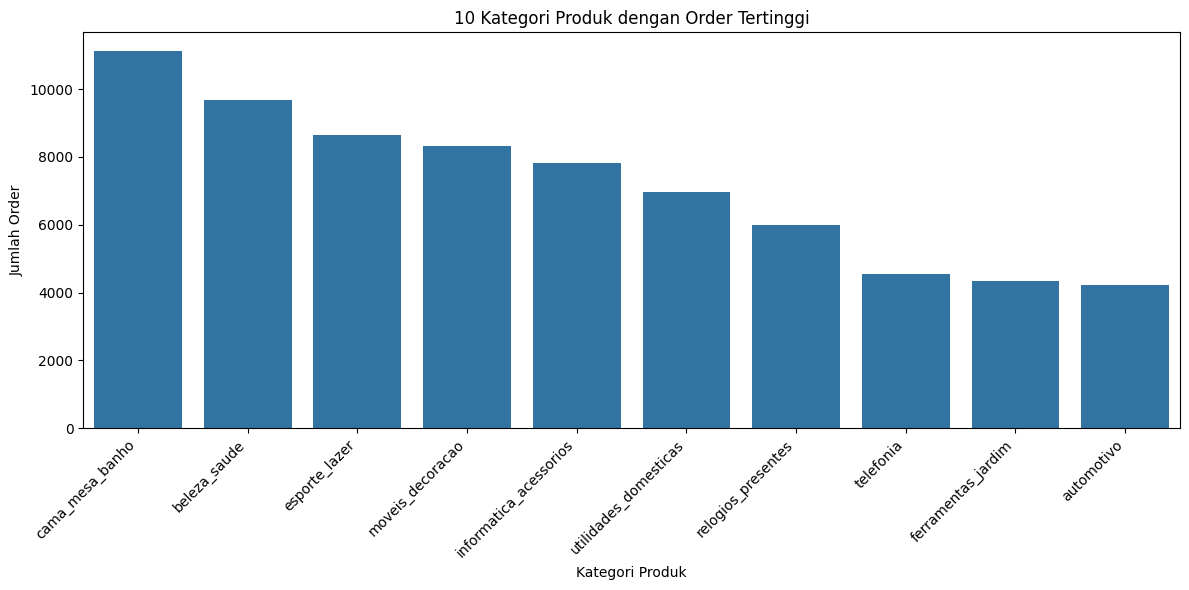

In [107]:
# Menghitung jumlah order untuk setiap kategori produk
product_order_counts = all_df.groupby('product_category_name')['order_id'].count().reset_index()

# Mengurutkan data berdasarkan jumlah order secara descending
product_order_counts = product_order_counts.sort_values(by=['order_id'], ascending=False)

# Mengambil 10 kategori produk dengan order tertinggi
top_10_products = product_order_counts.head(10)

# Membuat bar chart
plt.figure(figsize=(12, 6))  # Mengatur ukuran figure
sns.barplot(x='product_category_name', y='order_id', data=top_10_products)
plt.title('10 Kategori Produk dengan Order Tertinggi')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

**Insight:**
Produk yang paling banyak terjual adalah cama_mesa_banho

Pertanyaan 3: Bagaimana proses transaksi barjalan pada tahun 2017 dan 2018?

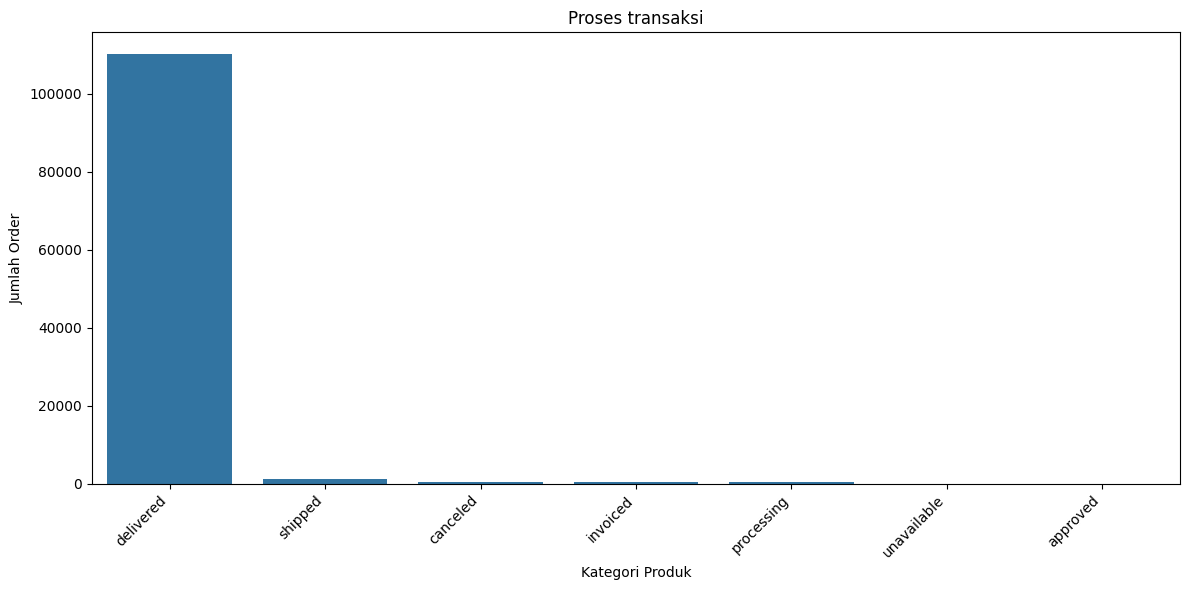

In [109]:
# Menghitung jumlah order untuk setiap kategori produk
product_order_counts = all_df.groupby('order_status')['order_id'].count().reset_index()

# Mengurutkan data berdasarkan jumlah order secara descending
product_order_counts = product_order_counts.sort_values(by=['order_id'], ascending=False)

# Mengambil 10 kategori produk dengan order tertinggi
top_10_products = product_order_counts.head(10)

# Membuat bar chart
plt.figure(figsize=(12, 6))  # Mengatur ukuran figure
sns.barplot(x='order_status', y='order_id', data=top_10_products)
plt.title('Proses transaksi')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

###Insight###
Dari transaksi yang terjadi, sebagian besar transaksi dapat diselesaikan. hal ini ditunjukkan dengan jumlah produ yang terkirim lebih banyak dari pada yang cancel.

## Analsis Lanjutan

Pada tahap ini akan dilakukan analisa lanjutan berupa penilaian kelompok konsumen yang didasarkan pada daerah penjualannya. Analisa ini dilakukan untuk menilai mana daerah yang terbaik dalam penjualan.

In [123]:
# membentuk data rfm
rfm_df = all_df.groupby(by="customer_state", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "mean" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_state", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head(10)

,customer_state,frequency,monetary,recency
0,AC,81,173.727717,57
1,AL,411,180.889212,63
2,AM,147,135.496000,64
3,AP,68,164.320732,62
4,BA,3358,134.601208,57
5,CE,1327,153.758261,55
6,DF,2125,125.770549,52
7,ES,2025,121.913701,53
8,GO,2007,126.271732,54
9,MA,740,145.204150,55


<ipython-input-122-f4e750d8e44d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_state", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-122-f4e750d8e44d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_state", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-122-f4e750d8e44d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_state", data=rfm_df.sort

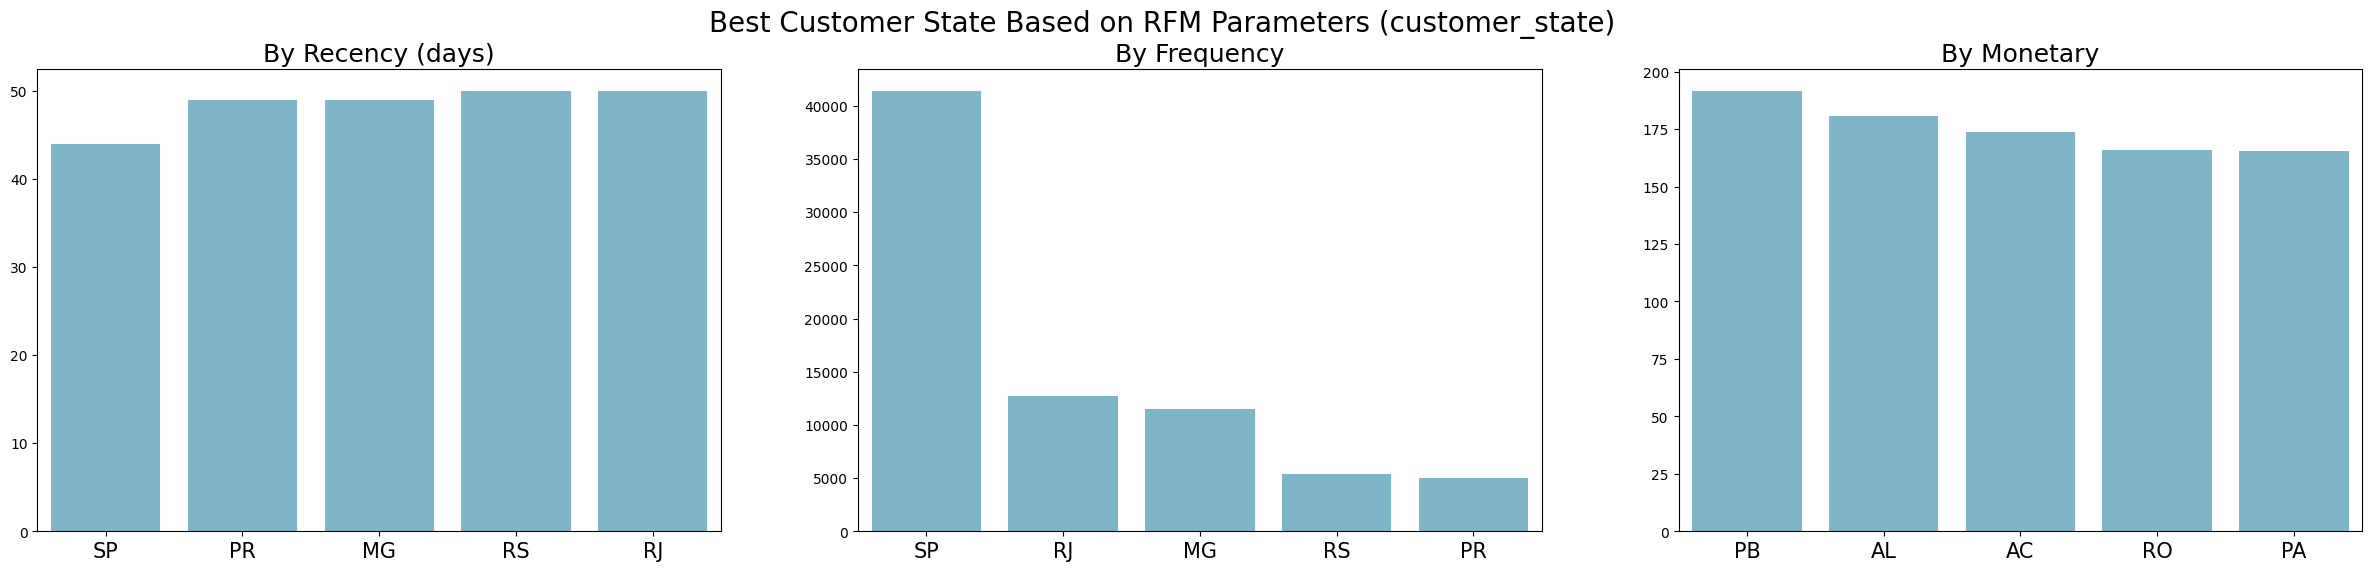

In [122]:
ig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_state", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_state", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_state", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer State Based on RFM Parameters (customer_state)", fontsize=20)
plt.show()

1. daerah terbaik menurut penjualan adalah SP. daerah ini memiliki tingkat penjualan yang tinggi.
2. sedangkan nilai transaksi yang terbesar dihasilkan daerah PB.


## Conclusion

- Conclution pertanyaan 1: Tranpenjualan mengalami peningkatan
- Conclution pertanyaan 2: produk yang paling laris adalah cama_mensa_banho
- Conclution pertanyaan 3: daerah yang memiliki tingkat penjualan tinggi adalah  SP, nmaun nilai penjualan tinggi adalah PB.

In [124]:
!pip freeze > requirements.txt

In [125]:
all_df.to_csv("all_data.csv", index=False)